In [5]:
# Import necessary packages
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import os

class DatasetLoader:
    def load(self, image_paths, verbose=-1):

        # Initialize the list of images and labels
        data = []
        labels = []

        # Loop over input paths to read the data
        for (i, path) in enumerate(image_paths):
            # Load images
            # Assuming path in following format            # /path/to/dataset/{class}/{image-name}.jpg
            image = cv.imread(path)
            label = path.split(os.path.sep)[-2]

            # Resize image
            image = cv.resize(image, (128, 128))
            
            orb = cv.ORB_create()
            # find the keypoints with ORB
            kp = orb.detect(image,None)
            # compute the descriptors with ORB
            kp, des = orb.compute(image, kp)
            # draw only keypoints location,not size and orientation
            image = cv.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)

            # Push into data list
            data.append(image)
            labels.append(label)

            # Show update
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1, len(image_paths)))

        # Return a tuple of data and labels
        return (np.array(data), np.array(labels))


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse



In [7]:
train_path="animals_dataset/animals"
class_names=os.listdir(train_path)

In [8]:
print(class_names)

['dogs', 'cats', 'panda']


In [9]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [10]:
image_paths=[]
for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path

In [11]:
print("[INFO] Loading images")
sdl = DatasetLoader()
(data, labels) = sdl.load(image_paths, verbose=500)


[INFO] Loading images
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


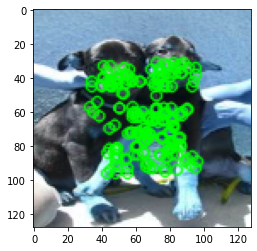

In [12]:
plt.imshow(data[9])

In [13]:
data = data.reshape((data.shape[0], 128*128*3))

In [14]:
print("[INFO] features matrix: {:.1f}MB".format(
    data.nbytes / (1024 * 1024.0)
))

[INFO] features matrix: 140.6MB


In [15]:
print(labels)
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)


['dogs' 'dogs' 'dogs' ... 'panda' 'panda' 'panda']
[1 1 1 ... 2 2 2]


In [16]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)


In [17]:
print("[INFO] evaluating k-NN classifier")

model = KNeighborsClassifier(n_neighbors=35)
model.fit(trainX, trainY)
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

[INFO] evaluating k-NN classifier
              precision    recall  f1-score   support

        cats       0.51      0.64      0.56       249
        dogs       0.44      0.61      0.51       262
       panda       0.97      0.27      0.42       239

    accuracy                           0.51       750
   macro avg       0.64      0.51      0.50       750
weighted avg       0.63      0.51      0.50       750



In [18]:
print([testX[1]])

[array([100, 121, 123, ..., 144, 169, 200], dtype=uint8)]


In [19]:
print(model.predict([testX[720]]))
print(testY[720])

[1]
0


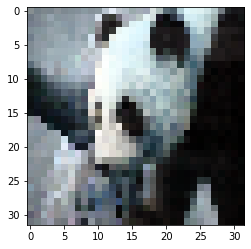

2
[2]


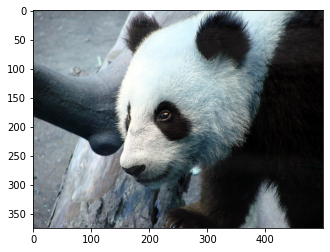

In [20]:
import random
import time
i = random.randint(1, 3000)
path = image_paths[i]
image_ori = cv.imread(path)
image = cv.resize(image_ori, (32, 32))

plt.imshow(image)
plt.show()
time.sleep(3)
print(labels[i])
print(model.predict([data[i]]))
plt.imshow(image_ori)



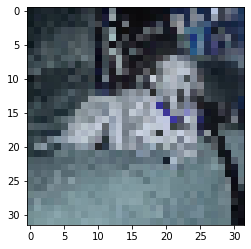

21:11:38: Main    : before creating thread
21:11:38: Main    : before running thread
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
TypeError: thread_player() takes 0 positional arguments but 1 was given


1
2
[0]
3
4
5


AttributeError: 'Thread' object has no attribute 'stop'

In [21]:
import logging
import threading
import time

i = random.randint(1, 3000)
path = image_paths[i]
image_ori = cv.imread(path)
image = cv.resize(image_ori, (32, 32))

plt.imshow(image)
plt.show()
bot_result = -1
player_result = -1
bot_point = 0
player_point = 0

def thread_bot(name):
    bot_result = model.predict([data[i]])
    time.sleep(2)
    print(model.predict([data[i]]))
    
def thread_player():
    player_result = input()
    print(player_result)
        

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

    logging.info("Main    : before creating thread")
    bot = threading.Thread(target=thread_bot, args=(1,))
    player = threading.Thread(target=thread_player, args=(2,))
    logging.info("Main    : before running thread")
    i = 0
    
bot.start()
player.start()

while i != 5:    
    time.sleep(1)
    i = i + 1
    print(i)

print()


plt.imshow(image_ori)   
    

In [22]:
def countdown(n):
    while n > 0:
        print('T-minus', n)
        n -= 1
        time.sleep(1)
          
# Create and launch a thread
from threading import Thread
t = Thread(target = countdown, args =(10, ))
# t.start() 
class CountdownTask():
      
    def __init__(self):
        self._running = True
      
    def terminate(self):
        self._running = False
      
    def run(self, n):
        while self._running and n > 0:
            print('T-minus', n)
            n -= 1
            time.sleep(5)
  
c = CountdownTask()
t = Thread(target = c.run, args =(10, ))
t.start()
...
# Signal termination
c.terminate() 
  
# Wait for actual termination (if needed) 
t.join() 



T-minus 10


In [36]:
import socket as sock
class IOTask:
    def __init__(self):
        self._running = True
    
    def terminate(self):
        self._running = False
          
    def run(self, sock):
        # sock is a socket

        # Set timeout period
        sock.settimeout(1) 
        while self._running:

            # Perform a blocking I/O operation w/timeout
            try:
                print(1)
                data = sock.recv(8192)
                print(data)
                break
            except socket.timeout:
                continue
            # Continued processing
            ...
    # Terminated
    
d = IOTask()
t = Thread(target=d.run, args=(10,))
t.start()

Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-36-201ad6f53b7e>", line 13, in run
AttributeError: 'int' object has no attribute 'settimeout'
